In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import emoji
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords');
nltk.download('punkt');
nltk.download('omw-1.4');
from sklearn import metrics
import unidecode
import contractions
%matplotlib inline



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
import unidecode
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
raw_tweets = pd.read_csv('./TrainingTwitterData.csv')

In [5]:
raw_tweets.head(10)

,Unnamed: 0,tweet,label
0,0,"I love how idiotic baboons, just saw one eat t...",0
1,1,We all know that toddlers are not allowed to b...,0
2,2,@user your comments about mrs. obama are offe...,1
3,3,"Violence outbursts, homosexuals died. Nothing ...",1
4,4,@user speechless when it comes to all the sho...,0
5,5,fuck the immigration support from UKBA- they'r...,0
6,6,@user this summer is about to be crazy. i can...,0
7,7,This government is a disaster I wish it would die,0
8,8,she is breastfeeding and this is awful for her...,1
9,9,The woman is a lazy mess. Her and the husband ...,0


In [6]:
len(raw_tweets)

28000

In [7]:
sentiment = raw_tweets['label'].value_counts()
sentiment

0    14009
1    13991
Name: label, dtype: int64

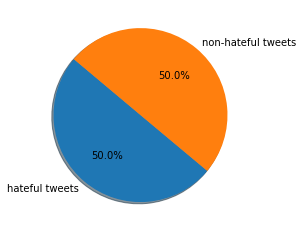

In [8]:
plt.pie(sentiment,labels=["hateful tweets", "non-hateful tweets"], autopct="%1.1f%%", shadow=True, startangle=140);
plt.show();

In [9]:
print(f'neutral tweets: {raw_tweets[raw_tweets.label==0].count()[0]}')
print(f'hateful tweets: {raw_tweets[raw_tweets.label==1].count()[0]}')

neutral tweets: 14009
hateful tweets: 13991


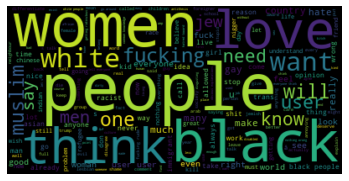

In [10]:
hate_tweets = raw_tweets[raw_tweets['label']==1]
hate_text = "".join(hate_tweet.lower() for hate_tweet in hate_tweets['tweet'])
wordcloud = WordCloud().generate(hate_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Remove RT (re-tweet) text from tweet if exists

In [11]:
def remove_retweet(tweet):
    tweet = re.sub('RT\s+', '', tweet)
    return tweet   

Remove numbers from tweets

In [12]:
def remove_numbers(tweet):
    return  re.sub(r'[0-9]+', '',tweet)

Remove greek characters

In [13]:
def remove_greek(tweet):
    return unidecode.unidecode(tweet)

##### Remove user tag @user

In [14]:
def remove_user_tag(tweet):
    tweet = re.sub('\B@\w+', '', tweet)
    return tweet 

##### Decode emojis if any

In [15]:
def decode_emoji(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

##### Remove URL

In [16]:
def remove_url(tweet):
    tweet = re.sub('(http|https):\/\/\S+', '', tweet)
    return tweet 

##### Remove hashtags

In [17]:
def remove_hashtag(tweet):
    tweet = re.sub(r'#+', '', tweet)
    return tweet 

##### Handling word features

In [18]:
# Change all words to lowercase

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [19]:
# Remove special characters

def remove_special_char(tweet):
    tweet = re.sub(r'[^A-Za-z]+\s?', ' ', tweet)
    return tweet

In [20]:
# Remove words with two or less characters

def remove_short_char(tweet):
    tweet = re.sub(r'\b\w{1,2}\b', ' ', tweet)
    return tweet

##### Word contractions

In [21]:
def contraction_expand(tweet):
    tweet = contractions.fix(tweet)
    return tweet

##### Checking for stop words

In [22]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [23]:
def tokenize_tweet(tweet):
  
  token_list = word_tokenize(tweet)
  stopwords = nltk.corpus.stopwords.words('english')

  # adding twitter specific stop words  
  new_stopwords = ["amp", "sm1", 'smh', 'idk', 'idc', 'lol', 'lmao', 'btw', 'fml', 'fyi', 'ftw', 'ftl', 'icymi', 'mtf'
                  ,'tbh', 'tbt', 'wtv', 'might', 'new']
  stopwords.extend(new_stopwords)
  token_list = [token for token in token_list if not token in stopwords]

  return token_list

##### Lemmatization

In [24]:
def lemmatize_tweets(tokens,lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token))
  return token_list

##### Tweet pre-processing

In [25]:
def preprocess_tweet(tweet):
  
  # Cleaning tweets
  tweet = remove_retweet(tweet) 
  tweet=remove_numbers(tweet)
  tweet=remove_greek(tweet)
  tweet = remove_user_tag(tweet)
  tweet = remove_url(tweet)
  tweet = remove_hashtag(tweet)  
  tweet = decode_emoji(tweet)
  
  # Handling word-features
  tweet = to_lowercase(tweet)
  tweet = contraction_expand(tweet) 
  tweet = remove_special_char(tweet)
  tweet = remove_short_char(tweet)  
  
  # Tokenizing & Lemmatizing
  tokens = tokenize_tweet(tweet) 
  tweet_lemmatizer = WordNetLemmatizer();
  lemma = lemmatize_tweets(tokens, tweet_lemmatizer) 
    
  return lemma

In [26]:
raw_tweets["tokens"] = raw_tweets["tweet"].apply(preprocess_tweet) 

In [27]:
def clean_tweets(tokenlist):
     return ' '.join(tokenlist)
    

In [28]:
raw_tweets['clean_tweet']=raw_tweets["tokens"].apply(clean_tweets)

In [29]:
clean_tweets=raw_tweets
clean_tweets.head(10)

,Unnamed: 0,tweet,label,tokens,clean_tweet
0,0,"I love how idiotic baboons, just saw one eat t...",0,"[love, idiotic, baboon, saw, one, eat, sick]",love idiotic baboon saw one eat sick
1,1,We all know that toddlers are not allowed to b...,0,"[know, toddler, allowed, accountable, action, ...",know toddler allowed accountable action parent...
2,2,@user your comments about mrs. obama are offe...,1,"[comment, mr, obama, offensive, fuher, confirm...",comment mr obama offensive fuher confirm racis...
3,3,"Violence outbursts, homosexuals died. Nothing ...",1,"[violence, outburst, homosexual, died, nothing...",violence outburst homosexual died nothing valu...
4,4,@user speechless when it comes to all the sho...,0,"[speechless, come, shooting, recently, guess, ...",speechless come shooting recently guess people...
5,5,fuck the immigration support from UKBA- they'r...,0,"[fuck, immigration, support, ukba, useless]",fuck immigration support ukba useless
6,6,@user this summer is about to be crazy. i can...,0,"[summer, crazy, already, tell, going, stay, wa...",summer crazy already tell going stay way show ...
7,7,This government is a disaster I wish it would die,0,"[government, disaster, wish, would, die]",government disaster wish would die
8,8,she is breastfeeding and this is awful for her...,1,"[breastfeeding, awful, health, well, woman, de...",breastfeeding awful health well woman deserves...
9,9,The woman is a lazy mess. Her and the husband ...,0,"[woman, lazy, mess, husband, tit, drink, regul...",woman lazy mess husband tit drink regular basi...


### Text vectorization

Term Frequency | Inverse Document Frequency Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
#Y is the outcome and X the input tweets for training
X=clean_tweets['clean_tweet']
Y=clean_tweets['label']

In [ ]:
td = TfidfVectorizer(max_features = 6000)
X = td.fit_transform(X).toarray()

### MODEL ALGORITHM

<b> Splitting the tweets into training and testing set:


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state =1)

In [34]:
x_train.shape, x_test.shape

((19600, 6000), (8400, 6000))

In [35]:
y_train.shape, y_test.shape

((19600,), (8400,))

<b> Using Naive Bayes Model Algorithm

In [48]:
from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB()
NB_clf.fit(x_train, y_train)    #fitting the datasets
tweet_predicted = NB_clf.predict(x_test) #predicting result
train_accuracy = NB_clf.predict(x_train)
train_acc = accuracy_score(y_train, train_accuracy)
train_acc

0.7716836734693877

<b> Creating Confusion matrix and checking performance: 

In [42]:
import seaborn as sns

[[2775 1425]
 [1329 2871]]


<AxesSubplot:>

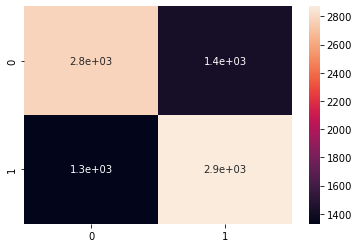

In [46]:
cm = confusion_matrix(y_test, tweet_predicted)
print(cm)
sns.heatmap(cm, annot = True)


In [43]:
print(classification_report(y_test, tweet_predicted))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      4200
           1       0.67      0.68      0.68      4200

    accuracy                           0.67      8400
   macro avg       0.67      0.67      0.67      8400
weighted avg       0.67      0.67      0.67      8400

